In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import itertools
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")

from os.path import join, exists, isfile, isdir
from os import makedirs, listdir

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 8}
matplotlib.rc('font', **font)

In [3]:
r

NameError: name 'r' is not defined

In [4]:
datasets = ["b_to_d", "moons40pbrff","moons10pbrff","moonstotal10","moonstotal20","moonstotal30", "moonstotal40", "moonstotal50", "moonstotal60", "moonstotal70", "moons30", "moons30nokl", "moons40","moons40cv", "moons50","moons51","moons52", "moons53", "moons57", "moons58","breast", "ads", "adult", "farm", "mnist17", "mnist49", "mnist56"]
experiments = ["baseline", "greedy_kernel", "landmarks_based"]

### Loading results

In [5]:
results_path = join(".", "results")
output_path = join(".", "results", "fig")
if not(exists(output_path)): makedirs(output_path)

In [6]:
def load_dir_results(dir_path):
    dir_results = []
    for f in [f for f in listdir(dir_path) if (isfile(join(dir_path, f)) and f.endswith(".pkl"))]:
        with open(join(dir_path, f), 'rb') as in_file:
            dir_results += pickle.load(in_file)
                
    for d in [d for d in listdir(dir_path) if isdir(join(dir_path, d))]:
        dir_results += load_dir_results(join(dir_path, d))
    
    return dir_results

def load_results(results_path):
    # Loading
    results = []
    for exp in set(listdir(results_path)).intersection(experiments):
        results += load_dir_results(join(results_path, exp))
    results = pd.DataFrame(results)
    return results

In [7]:
results_file = join(output_path, "results.pkl")
if not exists(results_file):
    results = load_results(results_path)
    with open(results_file, 'wb') as out_file:
        pickle.dump(results, out_file)
        
with open(results_file, 'rb') as in_file:
    results = pickle.load(in_file)
results = load_results(results_path)
results_per_dataset = {d:results.loc[results.dataset == d] for d in datasets}

In [214]:
r=results_per_dataset["moonstotal40"]

r_pbda = r.loc[r.algo == 'PBDA'].sort_values('n_landmarks', ascending=False).sort_values('beta', ascending=True)


    # Selecting beta and D based on error on the validation set
r_pbda = r_pbda.loc[r_pbda.groupby(['run', 'k'])["val_s_error"].idxmin()]

In [215]:
r

,dataset,exp,algo,C,gamma,time,train_error,val_s_error,val_t_error,test_error_t,...,run,degree,method,D,n_landmarks,beta,mean_max_q,c,b,beta_da
156,moonstotal40,baseline,SVM,0.01,10.0,9.510756,0.006250,0.000000,0.183333,0.160833,...,1,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,moonstotal40,baseline,SVM,10.00,100.0,20.003080,0.000000,0.000000,0.208333,0.244000,...,10,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,moonstotal40,baseline,SVM,0.01,10.0,9.000063,0.000000,0.000000,0.141667,0.179000,...,2,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,moonstotal40,baseline,SVM,0.01,10.0,8.994579,0.000000,0.000000,0.233333,0.196000,...,3,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,moonstotal40,baseline,SVM,0.01,10.0,9.996176,0.004167,0.000000,0.216667,0.178500,...,4,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128856,moonstotal40,landmarks,RBF,0.01,10.0,0.049000,0.047917,0.025000,0.150000,0.169167,...,5,40,random,NaN,8.0,NaN,NaN,NaN,NaN,NaN
128857,moonstotal40,landmarks,RBF,10.00,10.0,0.053998,0.185417,0.225000,0.200000,0.208333,...,6,40,random,NaN,8.0,NaN,NaN,NaN,NaN,NaN
128858,moonstotal40,landmarks,RBF,10000.00,10.0,0.052002,0.035417,0.033333,0.250000,0.231500,...,7,40,random,NaN,8.0,NaN,NaN,NaN,NaN,NaN
128859,moonstotal40,landmarks,RBF,10.00,10.0,0.050998,0.108333,0.116667,0.200000,0.222833,...,8,40,random,NaN,8.0,NaN,NaN,NaN,NaN,NaN


In [9]:
data=["moonstotal10","moonstotal20","moonstotal30", "moonstotal40", "moonstotal50", "moonstotal60", "moonstotal70"]
res_tot_mean=pd.DataFrame()
res_tot_std=pd.DataFrame()

j=0


for d in data:
    r=results_per_dataset[d]
    degrees=[10,20,30,40,50,60,70]
    
    ### SVM
    r_svm=r.loc[r.algo == 'SVM']
    r_svm=r_svm.groupby(['run']).mean()

    ##Save mean
    r_svm_mean=r_svm.mean()[["time", "train_error", "val_s_error", "val_t_error", "test_error_t", "f1_t", "test_error_s", "f1_s"]]
    r_svm_mean=pd.DataFrame(r_svm_mean).T
    r_svm_mean['algo']="SVM"
    #r_svm_mean['dataset']=d
    r_svm_mean['degree']=degrees[j]

    res_tot_mean=res_tot_mean.append(r_svm_mean)

    ##Save std
    r_svm_std=r_svm.std()[["time", "train_error", "val_s_error", "val_t_error", "test_error_t", "f1_t", "test_error_s", "f1_s"]]
    r_svm_std=pd.DataFrame(r_svm_std).T
    r_svm_std['algo']="SVM"
    #r_svm_std['dataset']=d
    r_svm_std['degree']=degrees[j]

    res_tot_std=res_tot_std.append(r_svm_std)

    
    ###RBF-landmarks

    r_rbf=r.loc[r.algo == 'RBF']
    res_r_rbf=[]
    
    for i in [1,2,3,4,5,6,7,8,9,10]:

        r_rbf_run=r_rbf.loc[r_rbf.run == i]
        r_rbf_run=r_rbf_run.groupby(['run','n_landmarks']).mean()
        res_r_rbf.append(r_rbf_run.loc[r_rbf_run.val_s_error.idxmin()])

    ##Save mean
    r_rbf_mean=pd.DataFrame(res_r_rbf).mean()[["time", "train_error", "val_s_error", "val_t_error", "test_error_t", "f1_t", "test_error_s", "f1_s"]]
    r_rbf_mean=pd.DataFrame(r_rbf_mean).T

    r_rbf_mean['algo']="RBF"
    #r_pb_mean['dataset']=d
    r_rbf_mean['degree']=degrees[j]
    
    res_tot_mean=res_tot_mean.append(r_rbf_mean)

    ##Save std
    r_rbf_std=pd.DataFrame(res_r_rbf).std()[["time", "train_error", "val_s_error", "val_t_error", "test_error_t", "f1_t", "test_error_s", "f1_s"]]
    r_rbf_std=pd.DataFrame(r_rbf_std).T

    r_rbf_std['algo']="RBF"
    #r_pb_std['dataset']=d
    r_rbf_std['degree']=degrees[j]
    
    res_tot_std=res_tot_std.append(r_rbf_std)

    ### PB

    r_pb=r.loc[r.algo == 'PB']
    res_r_pb=[]
    
    for i in [1,2,3,4,5,6,7,8,9,10]:

        r_pb_run=r_pb.loc[r_pb.run == i]
        r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
        res_r_pb.append(r_pb_run.loc[r_pb_run.val_s_error.idxmin()])

    ##Save mean
    r_pb_mean=pd.DataFrame(res_r_pb).mean()[["time", "train_error", "val_s_error", "val_t_error", "test_error_t", "f1_t", "test_error_s", "f1_s"]]
    r_pb_mean=pd.DataFrame(r_pb_mean).T

    r_pb_mean['algo']="PB"
    #r_pb_mean['dataset']=d
    r_pb_mean['degree']=degrees[j]
    
    res_tot_mean=res_tot_mean.append(r_pb_mean)

    ##Save std
    r_pb_std=pd.DataFrame(res_r_pb).std()[["time", "train_error", "val_s_error", "val_t_error", "test_error_t", "f1_t", "test_error_s", "f1_s"]]
    r_pb_std=pd.DataFrame(r_pb_std).T

    r_pb_std['algo']="PB"
    #r_pb_std['dataset']=d
    r_pb_std['degree']=degrees[j]
    
    res_tot_std=res_tot_std.append(r_pb_std)

    ### PBDA

    r_pbda=r.loc[r.algo == 'PBDA']
    res_r_pbda=[]
    
    for i in [1,2,3,4,5,6,7,8,9,10]:

        r_pbda_run=r_pbda.loc[r_pbda.run == i]
        r_pbda_run=r_pbda_run.groupby(['run', 'D', 'n_landmarks', 'c', 'b', 'beta_da']).mean()
        res_r_pbda.append(r_pbda_run.loc[r_pbda_run.val_t_error.idxmin()])

    ##Save mean
    r_pbda_mean=pd.DataFrame(res_r_pbda).mean()[["time", "train_error", "val_s_error", "val_t_error", "test_error_t", "f1_t", "test_error_s", "f1_s"]]
    r_pbda_mean=pd.DataFrame(r_pbda_mean).T

    r_pbda_mean['algo']="PBDA"
    #r_pbda_mean['dataset']=d
    r_pbda_mean['degree']=degrees[j]

    res_tot_mean=res_tot_mean.append(r_pbda_mean)

    ## Save std
    r_pbda_std=pd.DataFrame(res_r_pbda).std()[["time", "train_error", "val_s_error", "val_t_error", "test_error_t", "f1_t", "test_error_s", "f1_s"]]
    r_pbda_std=pd.DataFrame(r_pbda_std).T

    r_pbda_std['algo']="PBDA"
    #r_pbda_std['dataset']=d
    r_pbda_std['degree']=degrees[j]
    
    res_tot_std=res_tot_std.append(r_pbda_std)

    j+=1

#res_tot_std
res_tot_mean

,time,train_error,val_s_error,val_t_error,test_error_t,f1_t,test_error_s,f1_s,algo,degree
0,8.208647,0.001625,0.000000,0.003833,0.004730,0.995213,0.002837,0.997160,SVM,10
0,0.059743,0.037625,0.039333,0.053500,0.053000,0.949414,0.040993,0.962146,RBF,10
0,0.144606,0.004625,0.002833,0.017667,0.019627,0.980194,0.006313,0.993662,PB,10
0,0.065278,0.005458,0.003667,0.021500,0.021263,0.978576,0.009340,0.990622,PBDA,10
0,8.457446,0.001375,0.000000,0.035500,0.034250,0.964627,0.002993,0.997004,SVM,20
0,0.050577,0.041125,0.041167,0.106000,0.104320,0.883563,0.043157,0.952399,RBF,20
0,0.111101,0.003750,0.001667,0.078667,0.078470,0.919212,0.006180,0.993803,PB,20
0,0.082497,0.004875,0.003500,0.075500,0.075567,0.922891,0.008277,0.991734,PBDA,20
0,8.517661,0.001958,0.000167,0.089000,0.087400,0.907204,0.003007,0.996990,SVM,30
0,0.050320,0.031500,0.029500,0.175833,0.183343,0.791128,0.033353,0.963331,RBF,30


In [17]:
res_tot_std[res_tot_std["degree"]==70]

,time,train_error,val_s_error,val_t_error,test_error_t,f1_t,test_error_s,f1_s,algo,degree
0,2.489737,0.001097,0.000000,0.066681,0.057244,0.014768,0.000436,0.000439,SVM,70
0,0.008631,0.017946,0.018248,0.050482,0.047463,0.028803,0.017288,0.020343,RBF,70
0,0.043399,0.000998,0.001125,0.051868,0.049872,0.044538,0.000933,0.000932,PB,70
0,0.009299,0.005529,0.004635,0.034445,0.029825,0.035687,0.006690,0.006759,PBDA,70


In [16]:
res_tot_mean[res_tot_mean["degree"]==70]

,time,train_error,val_s_error,val_t_error,test_error_t,f1_t,test_error_s,f1_s,algo,degree
0,9.778237,0.001833,0.000000,0.563333,0.567097,0.413452,0.002680,0.997316,SVM,70
0,0.062443,0.021667,0.020167,0.550167,0.550513,0.440780,0.023013,0.975172,RBF,70
0,0.138907,0.002000,0.000500,0.551000,0.556457,0.440958,0.003620,0.996376,PB,70
0,0.073639,0.004125,0.002000,0.552833,0.566753,0.439199,0.006500,0.993458,PBDA,70


In [197]:
r_pb=r.loc[r.algo == 'RBF']
res_r_pb=[]
    
for i in [1,2,3,4,5,6,7,8,9,10]:

    r_pb_run=r_pb.loc[r_pb.run == i]
    r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
    res_r_pb.append(r_pb_run.loc[r_pb_run.test_error_s.idxmin()])


r_pb=pd.DataFrame(res_r_pb).mean()[["time", "train_error", "val_s_error", "val_t_error", "test_error_t", "f1_t", "test_error_s", "f1_s"]]
r_pb=pd.DataFrame(r_pb).T

r_pb['algo']="svm"
r_pb['dataset']="e"
r_pb['degree']=10


In [221]:
r_pb=r.loc[r.algo == 'RBF']
r_pb_run=r_pb.loc[r_pb.run == 1]
r_pb_run=r_pb_run.groupby(['run','n_landmarks']).mean()
r_pb_run.loc[r_pb_run.test_error_s.idxmin()]


C               2008.000000
gamma              4.600000
time               0.048903
train_error        0.001667
val_s_error        0.001667
val_t_error        0.323333
test_error_t       0.333667
f1_t               0.627648
test_error_s       0.003267
f1_s               0.996726
k                  3.000000
degree            40.000000
D                       NaN
beta                    NaN
mean_max_q              NaN
c                       NaN
b                       NaN
beta_da                 NaN
Name: (1, 16.0), dtype: float64

In [192]:
r_pb=r.loc[r.algo == 'PB']
res_r_pb=[]
i=1

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.test_error_s.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.test_error_s.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.test_error_s.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.test_error_s.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.test_error_s.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.test_error_s.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.test_error_s.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.test_error_s.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.test_error_s.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.test_error_s.idxmin()])


a=pd.DataFrame(res_r_pb).mean()[["time", "train_error", "val_s_error", "val_t_error", "test_error_t", "f1_t", "test_error_s", "f1_s"]]
a=pd.DataFrame(a).T

a['algo']="svm"
a['dataset']="m"
a['degree']=10
a


,time,train_error,val_s_error,val_t_error,test_error_t,f1_t,test_error_s,f1_s,algo,dataset,degree
0,0.16032,0.002625,0.0025,0.477333,0.47818,0.513515,0.00487,0.995114,svm,m,10


C               404.205400
gamma            23.500000
time              0.144606
train_error       0.004625
val_s_error       0.002833
val_t_error       0.017667
test_error_t      0.019627
f1_t              0.980194
test_error_s      0.006313
f1_s              0.993662
k                 3.000000
degree           10.000000
mean_max_q        0.748023
c                      NaN
b                      NaN
beta_da                NaN
dtype: float64

In [123]:
r_pbda=r.loc[r.algo == 'PB']
res_r_pbda=[]
i=1

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.val_s_error.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.val_s_error.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.val_s_error.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.val_s_error.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.val_s_error.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.val_s_error.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.val_s_error.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.val_s_error.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.val_s_error.idxmin()])

r_pb_run=r_pb.loc[r_pb.run == i]
i+=1
r_pb_run=r_pb_run.groupby(['run', 'D', 'n_landmarks', 'beta']).mean()
res_r_pb.append(r_pb_run.loc[r_pb_run.val_s_error.idxmin()])


pd.DataFrame(res_r_pb).mean()



C               364.205440
gamma            23.500000
time              0.146866
train_error       0.004508
val_s_error       0.002900
val_t_error       0.017133
test_error_t      0.019033
f1_t              0.980789
test_error_s      0.006191
f1_s              0.993785
k                 3.000000
degree           10.000000
mean_max_q        0.765368
c                      NaN
b                      NaN
beta_da                NaN
dtype: float64

In [122]:
r_pbda=r.loc[r.algo == 'PBDA']
res_r_pbda=[]
i=1

r_pbda_run=r_pbda.loc[r_pbda.run == i]
i+=1
r_pbda_run=r_pbda_run.groupby(['run', 'D', 'n_landmarks', 'c', 'b', 'beta_da']).mean()
res_r_pbda.append(r_pbda_run.loc[r_pbda_run.val_s_error.idxmin()])

r_pbda_run=r_pbda.loc[r_pbda.run == i]
i+=1
r_pbda_run=r_pbda_run.groupby(['run', 'D', 'n_landmarks', 'c', 'b', 'beta_da']).mean()
res_r_pbda.append(r_pbda_run.loc[r_pbda_run.val_s_error.idxmin()])

r_pbda_run=r_pbda.loc[r_pbda.run == i]
i+=1
r_pbda_run=r_pbda_run.groupby(['run', 'D', 'n_landmarks', 'c', 'b', 'beta_da']).mean()
res_r_pbda.append(r_pbda_run.loc[r_pbda_run.val_s_error.idxmin()])

r_pbda_run=r_pbda.loc[r_pbda.run == i]
i+=1
r_pbda_run=r_pbda_run.groupby(['run', 'D', 'n_landmarks', 'c', 'b', 'beta_da']).mean()
res_r_pbda.append(r_pbda_run.loc[r_pbda_run.val_s_error.idxmin()])

r_pbda_run=r_pbda.loc[r_pbda.run == i]
i+=1
r_pbda_run=r_pbda_run.groupby(['run', 'D', 'n_landmarks', 'c', 'b', 'beta_da']).mean()
res_r_pbda.append(r_pbda_run.loc[r_pbda_run.val_s_error.idxmin()])

r_pbda_run=r_pbda.loc[r_pbda.run == i]
i+=1
r_pbda_run=r_pbda_run.groupby(['run', 'D', 'n_landmarks', 'c', 'b', 'beta_da']).mean()
res_r_pbda.append(r_pbda_run.loc[r_pbda_run.val_s_error.idxmin()])

r_pbda_run=r_pbda.loc[r_pbda.run == i]
i+=1
r_pbda_run=r_pbda_run.groupby(['run', 'D', 'n_landmarks', 'c', 'b', 'beta_da']).mean()
res_r_pbda.append(r_pbda_run.loc[r_pbda_run.val_s_error.idxmin()])

r_pbda_run=r_pbda.loc[r_pbda.run == i]
i+=1
r_pbda_run=r_pbda_run.groupby(['run', 'D', 'n_landmarks', 'c', 'b', 'beta_da']).mean()
res_r_pbda.append(r_pbda_run.loc[r_pbda_run.val_s_error.idxmin()])

r_pbda_run=r_pbda.loc[r_pbda.run == i]
i+=1
r_pbda_run=r_pbda_run.groupby(['run', 'D', 'n_landmarks', 'c', 'b', 'beta_da']).mean()
res_r_pbda.append(r_pbda_run.loc[r_pbda_run.val_s_error.idxmin()])

r_pbda_run=r_pbda.loc[r_pbda.run == i]
i+=1
r_pbda_run=r_pbda_run.groupby(['run', 'D', 'n_landmarks', 'c', 'b', 'beta_da']).mean()
res_r_pbda.append(r_pbda_run.loc[r_pbda_run.val_s_error.idxmin()])

pd.DataFrame(res_r_pbda).mean()



C               204.805000
gamma            23.500000
time              0.065278
train_error       0.005458
val_s_error       0.003667
val_t_error       0.021500
test_error_t      0.021263
f1_t              0.978576
test_error_s      0.009340
f1_s              0.990622
k                 3.000000
degree           10.000000
beta                   NaN
mean_max_q        0.440384
dtype: float64

In [130]:
r_pbda_run=r.loc[r.algo == 'PBDA']
res_r_pbda=[]
i=1

r_pbda_run
r_pbda_run=r_pbda_run.groupby(['D', 'n_landmarks', 'c', 'b', 'beta_da']).mean()
res_r_pbda.append(r_pbda_run.loc[r_pbda_run.groupby(['run'])["time"].idxmin()])
res_r_pbda


[                                          C  gamma      time  train_error  \
 D    n_landmarks c    b   beta_da                                           
 16.0 8.0         0.01 0.1 1000.0   406.2034   23.5  0.058197     0.020667   
 
                                    val_s_error  val_t_error  test_error_t  \
 D    n_landmarks c    b   beta_da                                           
 16.0 8.0         0.01 0.1 1000.0      0.023667        0.035      0.036577   
 
                                        f1_t  test_error_s     f1_s    k  run  \
 D    n_landmarks c    b   beta_da                                              
 16.0 8.0         0.01 0.1 1000.0   0.962358      0.024943  0.97467  3.0  5.5   
 
                                    degree  beta  mean_max_q  
 D    n_landmarks c    b   beta_da                            
 16.0 8.0         0.01 0.1 1000.0     10.0   NaN    0.295893  ]

In [24]:
r_pbda.groupby(['method', 'n_landmarks', 'beta']).mean()


C     D  perc_landmarks  gamma  \
method n_landmarks beta                                               
random 8.0         0.001       52.7500  30.0            0.01    1.0   
                   0.010       52.7500  30.0            0.01    1.0   
                   0.100       52.7500  30.0            0.01    1.0   
                   1.000     2552.5000  30.0            0.01    1.0   
                   10.000     280.0000  30.0            0.01    1.0   
                   100.000    257.5000  30.0            0.01    1.0   
                   1000.000   257.5000  30.0            0.01    1.0   
       36.0        0.001        0.1000  30.0            0.05    1.0   
                   0.010        0.1000  30.0            0.05    1.0   
                   0.100        0.1000  30.0            0.05    1.0   
                   1.000        0.1000  30.0            0.05    1.0   
                   10.000       0.1000  30.0            0.05    1.0   
                   100.000      0.1000  30.0            0.05    1.0   
                   1000.000     0.1000  30.0            0.05    1.0   
       72.0        0.001        0.0775  30.0            0.10    1.0   
                   0.010        0.0775  30.0            0.10    1.0   
                   0.100        0.0775  30.0            0.10    1.0   
                   1.000        0.0775  30.0            0.10    1.0   
                   10.000       0.0100  30.0            0.10    1.0   
                   100.000      0.0100  30.0            0.10    1.0   
                   1000.000     0.0100  30.0            0.10    1.0   
       108.0       0.001        0.0775  30.0            0.15    1.0   
                   0.010        0.0775  30.0            0.15    1.0   
                   0.100        0.0775  30.0            0.15    1.0   
                   1.000        0.0325  30.0            0.15    1.0   
                   10.000       0.0100  30.0            0.15    1.0   
                   100.000      0.0100  30.0            0.15    1.0   
                   1000.000     0.0100  30.0            0.15    1.0   
       144.0       0.001        0.0775  30.0            0.20    1.0   
                   0.010        0.0775  30.0            0.20    1.0   
                   0.100        0.0775  30.0            0.20    1.0   
                   1.000        0.0100  30.0            0.20    1.0   
                   10.000       0.0100  30.0            0.20    1.0   
                   100.000      0.0100  30.0            0.20    1.0   
                   1000.000     0.0100  30.0            0.20    1.0   
       180.0       0.001        0.0325  30.0            0.25    1.0   
                   0.010        0.0325  30.0            0.25    1.0   
                   0.100        0.0325  30.0            0.25    1.0   
                   1.000        0.0100  30.0            0.25    1.0   
                   10.000       0.0100  30.0            0.25    1.0   
                   100.000      0.0100  30.0            0.25    1.0   
                   1000.000     0.0100  30.0            0.25    1.0   

                             train_error  val_error  test_error        f1  \
method n_landmarks beta                                                     
random 8.0         0.001        0.002083   0.005208    0.002778  0.997059   
                   0.010        0.001736   0.003472    0.002778  0.997059   
                   0.100        0.001736   0.003472    0.002778  0.997059   
                   1.000        0.001042   0.001736    0.001389  0.998538   
                   10.000       0.000000   0.000000    0.000000  1.000000   
                   100.000      0.000000   0.000000    0.000000  1.000000   
                   1000.000     0.000000   0.000000    0.000000  1.000000   
       36.0        0.001        0.000000   0.000000    0.000000  1.000000   
                   0.010        0.000000   0.000000    0.000000  1.000000   
                   0.100        0.000000   0.000000    0.000000  

In [7]:
results[(results["dataset"]=='breast') & (results["beta"]==1000.000) & (results["C"]==0.00001)]

,dataset,exp,algo,method,C,D,n_landmarks,perc_landmarks,gamma,beta,...,val_error,test_error,f1,mean_max_q,c,b,val_s_error,val_t_error,beta_da,time


In [48]:
results_per_dataset['moons30']

results.loc[results[(results["algo"]=="PBDA") & (results["dataset"]=="moons30")]["test_error"].idxmin()]

#min(results[(results["algo"]=="PBDA") & (results["dataset"]=="moons30")]["test_error"])

dataset             moons30
exp               landmarks
algo                   PBDA
C                       0.1
gamma                   1.0
time                    NaN
train_error        0.040278
val_error               0.0
test_error              0.0
f1                      1.0
method               random
D                      32.0
n_landmarks             8.0
perc_landmarks         0.01
beta                  0.001
mean_max_q          0.03125
c                      10.0
b                      10.0
beta_da                 NaN
val_s_error             NaN
val_t_error             NaN
Name: 5520, dtype: object

In [ ]:
results[(results["algo"]=='PB') & (results["perc_landmarks"]==0.20)]

# Greedy Kernel Learning

In [ ]:
N = 20000
max_D = 5000

%pylab inline
pylab.rcParams['figure.figsize'] = (6, 4)
for d in datasets:
    print(d)
    r = results_per_dataset[d]

    # SVM
    svm_error = list(r.loc[r.algo == 'SVM']['test_error'])[0]
    plt.axhline(y=svm_error, color='r', linestyle='-', linewidth=1, label="SVM RBF")

    # RFF
    r_rff = r.loc[r.algo == 'RFF'].loc[r.D <= max_D].set_index('D')
    plt.semilogx(r_rff['train_error'], "--", label=f"RFF-train",color ='g', linewidth=0.9, alpha=0.4)
    plt.semilogx(r_rff['test_error'], "-", label=f"RFF-test", color ='g', linewidth=1.1)
    
    # Optimized Kernel RFF
    r_okrff = r.loc[r.algo == 'OKRFF'].loc[r.D <= max_D]
    r_okrff = r.loc[r_okrff.groupby(['D'])["val_error"].idxmin()].set_index('D')
    plt.semilogx(r_okrff['train_error'], "--", label=f"OKRFF-train", color ='y', linewidth=0.9,alpha=0.4)
    plt.semilogx(r_okrff['test_error'], "-", label=f"OKRFF-test", color ='y', linewidth=1)
    
    # PAC-Bayes RFF
    r_pbdarff = r.loc[r.algo == 'PBRFF'].loc[r.D <= max_D].sort_values('beta', ascending=False)
    r_pbdarff = r.loc[r_pbdarff.groupby(['D'])["val_error"].idxmin()].set_index('D')
    plt.semilogx(r_pbdarff['train_error'], "--", label=f"PBRFF-train", color ='b', linewidth=0.9,alpha=0.4)
    plt.semilogx(r_pbdarff['test_error'], "-", label=f"PBRFF-test", color ='b', linewidth=1)
    
    sns.despine(top=True, right=True)
    if d in ["mnist49", "mnist17"]:
        leg = plt.legend(frameon=True, fontsize='x-large')
        leg_lines = leg.get_lines()
        plt.setp(leg_lines, linewidth=1.3)
    plt.tight_layout()
    plt.autoscale(enable=True, axis='x', tight=True)
    tick_params(axis='both', which='both', pad=2, direction='in', labelsize=11)
    plt.savefig(join(output_path, f"error_vs_features_{d}.pdf"))
    plt.show()

# Landmarks-Based Learning

####  Test error of the landmarks-based approach

In [ ]:
landmarks_method = 'random'
perc_landmarks = 0.2
beta = 1
D = 64

### SVM ###
svm_results = pd.DataFrame(results.loc[results.algo == 'SVM'].set_index('dataset')['test_error'])\
                                                             .rename(columns={'test_error': 'svm'})

### RBF ###
rbf_results = pd.DataFrame(results.loc[(results.algo == 'RBF') & \
                                       (results.perc_landmarks == perc_landmarks) & \
                                       (results.method == landmarks_method)] \
                                       .set_index('dataset')['test_error']) \
                                       .rename(columns={'test_error': 'rbf'})
### PAC-Bayes ###
pb_results = results.loc[(results.algo == 'PB') & (results.perc_landmarks == perc_landmarks) & \
                         (results.method == landmarks_method)].sort_values('beta', ascending=True)

# beta and D optimized on validation set

pb_results_optimized = pd.DataFrame(pb_results.loc[pb_results.groupby(['method', 'nb_landmarks', 'dataset']) \
                                                  ["test_error"].idxmin()].set_index('dataset')['test_error']) \
                                                  .rename(columns={'test_error': 'pb'})

# beta fixed, D optimized on validation set
pb_results_beta = pb_results.loc[pb_results.beta == beta]
pb_results_beta = pd.DataFrame(pb_results_beta.loc[pb_results_beta.groupby(['method', 'nb_landmarks', 'dataset']) \
                                                  ["test_error"].idxmin()].set_index('dataset')['test_error'])\
                                                  .rename(columns={'test_error': 'pb_beta'})

# beta optimized on validation set, D fixed
pb_results_D = pb_results.loc[pb_results.D == D]
pb_results_D = pd.DataFrame(pb_results_D.loc[pb_results_D.groupby(['method', 'nb_landmarks', 'dataset']) \
                                            ["test_error"].idxmin()].set_index('dataset')['test_error']) \
                                            .rename(columns={'test_error': 'pb_D'})

### PAC-Bayes ###
pbda_results = results.loc[(results.algo == 'PBDA') & (results.perc_landmarks == perc_landmarks) & \
                         (results.method == landmarks_method)].sort_values('beta', ascending=True)

# beta and D optimized on validation set

pbda_results_optimized = pd.DataFrame(pbda_results.loc[pbda_results.groupby(['method', 'nb_landmarks', 'dataset']) \
                                                  ["test_error"].idxmin()].set_index('dataset')['test_error']) \
                                                  .rename(columns={'test_error': 'pbda'})

# beta fixed, D optimized on validation set
pbda_results_beta = pbda_results.loc[pbda_results.beta == beta]
pbda_results_beta = pd.DataFrame(pbda_results_beta.loc[pbda_results_beta.groupby(['method', 'nb_landmarks', 'dataset']) \
                                                  ["test_error"].idxmin()].set_index('dataset')['test_error'])\
                                                  .rename(columns={'test_error': 'pbda_beta'})

# beta optimized on validation set, D fixed
pbda_results_D = pbda_results.loc[pbda_results.D == D]
pbda_results_D = pd.DataFrame(pbda_results_D.loc[pbda_results_D.groupby(['method', 'nb_landmarks', 'dataset']) \
                                            ["test_error"].idxmin()].set_index('dataset')['test_error']) \
                                            .rename(columns={'test_error': 'pbda_D'})


table = svm_results.join(rbf_results).join(pbda_results_optimized).join(pbda_results_beta).join(pbda_results_D).join(pb_results_optimized).join(pb_results_beta).join(pb_results_D)
table = (100*table).round(2).sort_index()
print(table.to_latex())

In [ ]:
pb_results.loc[pb_results.groupby(['method', 'perc_landmarks', 'dataset']) ["test_error"].idxmin()].set_index('dataset')['test_error']
                                              

#### Behavior of the Landmarks-based approach according to the percentage of training points selected as landmarks

In [26]:
%pylab inline
pylab.rcParams['figure.figsize'] = (7, 5)
datasets=["moonstotal40"]
for d in datasets :
    print(f"Dataset: {d}")
    r = results_per_dataset[d]
    
    ### SVM ###
    svm_error = list(r.loc[r.algo == 'SVM']['test_error'])[0]
    plt.axhline(y=svm_error, color='r', linestyle='-', linewidth=1.2, label="SVM RBF")
    
    ### RBF ###
    r_rbf = r.loc[r.algo == 'RBF'].sort_values('n_landmarks')
    for method in r_rbf.method.unique():
        plt.plot(r_rbf.loc[r_rbf.method == method].set_index(['n_landmarks'])['test_error'], 
                 '--' if method == "random" else "-", 
                 label=f"RBF Landmarks" + ("-R" if method == "random" else "-C"),
                 color = 'g',
                 linewidth=1)

     ### PAC-Bayes ###
    r_pb = r.loc[r.algo == 'PB'].sort_values('n_landmarks', ascending=False).sort_values('beta', ascending=True)

    # Selecting beta and D based on error on the validation set
    r_pb = r_pb.loc[r_pb.groupby(['method', 'n_landmarks'])["val_error"].idxmin()]
    for method in r_pb.method.unique():
        plt.plot(r_pb.loc[r_pb.method == method].set_index(['n_landmarks'])['test_error'], 
                 '--' if method == "random" else "-", 
                 label=f"PB Landmarks"  + ("-R" if method == "random" else "-C"),
                 color = 'r',
                 linewidth = 1)
         
    ### PAC-Bayes ###
    r_pbda = r.loc[r.algo == 'PBDA'].sort_values('n_landmarks', ascending=False).sort_values('beta', ascending=True)

    # Selecting beta and D based on error on the validation set
    r_pbda = r_pbda.loc[r_pbda.groupby(['method', 'n_landmarks'])["val_error"].idxmin()]
    for method in r_pbda.method.unique():
        plt.plot(r_pbda.loc[r_pbda.method == method].set_index(['n_landmarks'])['test_error'], 
                 '--' if method == "random" else "-", 
                 label=f"PBDA Landmarks"  + ("-R" if method == "random" else "-C"),
                 color = 'b',
                 linewidth = 1)

    plt.title(str(d)+"° de rotation", fontsize=25)
    plt.xlabel("Percentage of landmarks", fontsize=14)
    plt.ylabel("Misclassification error", fontsize=14)
    sns.despine(top=True, right=True)
    plt.tight_layout()
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.tick_params(axis='both', which='both', pad=3, direction='out', labelsize=12)
    plt.legend(frameon=True, fontsize='large')
    if d == "farm":
        plt.legend(frameon=True, fontsize='large')
    elif d == "ads":
        plt.legend(frameon=True, fontsize='large',loc=(0.64, 0.32))
    plt.savefig(join(output_path, f"error_landmarks_{d}.pdf"))
    plt.show()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Dataset: moonstotal40


KeyError: 'test_error'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Dataset: moonstotal40


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

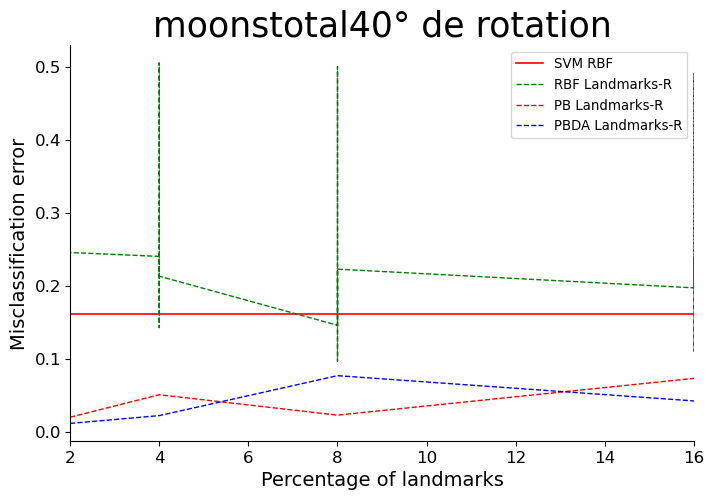

In [36]:
%pylab inline
pylab.rcParams['figure.figsize'] = (7, 5)
datasets=["moonstotal40"]
for d in datasets :
    print(f"Dataset: {d}")
    r = results_per_dataset[d]
    
    ### SVM ###
    svm_error = list(r.loc[r.algo == 'SVM']['test_error_t'])[0]
    plt.axhline(y=svm_error, color='r', linestyle='-', linewidth=1.2, label="SVM RBF")
    
    ### RBF ###
    r_rbf = r.loc[r.algo == 'RBF'].sort_values('n_landmarks')
    for method in r_rbf.method.unique():
        plt.plot(r_rbf.loc[r_rbf.method == method].set_index(['n_landmarks'])['test_error_t'], 
                 '--' if method == "random" else "-", 
                 label=f"RBF Landmarks" + ("-R" if method == "random" else "-C"),
                 color = 'g',
                 linewidth=1)

     ### PAC-Bayes ###
    r_pb = r.loc[r.algo == 'PB'].sort_values('n_landmarks', ascending=False).sort_values('beta', ascending=True)

    # Selecting beta and D based on error on the validation set
    r_pb = r_pb.loc[r_pb.groupby(['method', 'n_landmarks'])["val_t_error"].idxmin()]
    for method in r_pb.method.unique():
        plt.plot(r_pb.loc[r_pb.method == method].set_index(['n_landmarks'])['test_error_t'], 
                 '--' if method == "random" else "-", 
                 label=f"PB Landmarks"  + ("-R" if method == "random" else "-C"),
                 color = 'r',
                 linewidth = 1)
         
    ### PAC-Bayes ###
    r_pbda = r.loc[r.algo == 'PBDA'].sort_values('n_landmarks', ascending=False).sort_values('beta_da', ascending=True)

    # Selecting beta and D based on error on the validation set
    r_pbda = r_pbda.loc[r_pbda.groupby(['method', 'n_landmarks'])["val_t_error"].idxmin()]
    for method in r_pbda.method.unique():
        plt.plot(r_pbda.loc[r_pbda.method == method].set_index(['n_landmarks'])['test_error_t'], 
                 '--' if method == "random" else "-", 
                 label=f"PBDA Landmarks"  + ("-R" if method == "random" else "-C"),
                 color = 'b',
                 linewidth = 1)

    plt.title(str(d)+"° de rotation", fontsize=25)
    plt.xlabel("Percentage of landmarks", fontsize=14)
    plt.ylabel("Misclassification error", fontsize=14)
    sns.despine(top=True, right=True)
    plt.tight_layout()
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.tick_params(axis='both', which='both', pad=3, direction='out', labelsize=12)
    plt.legend(frameon=True, fontsize='large')
    if d == "farm":
        plt.legend(frameon=True, fontsize='large')
    elif d == "ads":
        plt.legend(frameon=True, fontsize='large',loc=(0.64, 0.32))
    plt.savefig(join(output_path, f"error_landmarks_{d}.pdf"))
    plt.show()

In [31]:
r.loc[r.algo == 'SVM']

,dataset,exp,algo,C,gamma,time,train_error,val_s_error,val_t_error,test_error_t,...,run,degree,method,D,n_landmarks,beta,mean_max_q,c,b,beta_da
156,moonstotal40,baseline,SVM,0.01,10.0,9.510756,0.006250,0.0,0.183333,0.160833,...,1,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,moonstotal40,baseline,SVM,10.00,100.0,20.003080,0.000000,0.0,0.208333,0.244000,...,10,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,moonstotal40,baseline,SVM,0.01,10.0,9.000063,0.000000,0.0,0.141667,0.179000,...,2,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,moonstotal40,baseline,SVM,0.01,10.0,8.994579,0.000000,0.0,0.233333,0.196000,...,3,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,moonstotal40,baseline,SVM,0.01,10.0,9.996176,0.004167,0.0,0.216667,0.178500,...,4,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,moonstotal40,baseline,SVM,0.01,10.0,9.998083,0.000000,0.0,0.191667,0.193833,...,5,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,moonstotal40,baseline,SVM,0.01,10.0,7.992029,0.002083,0.0,0.125000,0.159333,...,6,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,moonstotal40,baseline,SVM,0.01,10.0,9.000540,0.004167,0.0,0.183333,0.163167,...,7,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,moonstotal40,baseline,SVM,0.01,10.0,10.004282,0.000000,0.0,0.150000,0.184333,...,8,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,moonstotal40,baseline,SVM,0.01,10.0,8.999586,0.002083,0.0,0.158333,0.189167,...,9,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
r = results_per_dataset
    
    ### SVM ###
svm_error = list(r.loc[r.algo == 'PB']['test_error'])[0]
svm_error

In [ ]:
results_per_dataset["moons30nokl"]

In [ ]:

results.loc[results[(results["algo"]=="PB") & (results["dataset"]=="moons30")]["test_error"].idxmin()]
#results.loc[results[(results["algo"]=="PBDA") & (results["dataset"]=="moons40cv")]["test_error"].idxmin()]

In [ ]:
results[(results["algo"]=="PBDA") & (results["dataset"]=="moons40cv")]

results.loc[results[(results["algo"]=="PBDA") & (results["dataset"]=="moons30")]["test_error"].idxmin()]

In [ ]:
results_per_dataset["moons30"]

In [ ]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()